In [1]:
pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/omkargaikwad0405/eece5645-project/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omkargaikwad0405
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/omkargaikwad0405/eece5645-project


100%|██████████| 12.7G/12.7G [10:48<00:00, 21.0MB/s]


In [3]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,190 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,625 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:13 https://ppa.launchp

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [15]:
train_csv = "/content/eece5645-project/ISIC_2019_Training_GroundTruth.csv"
image_folder = "/content/eece5645-project/ISIC_2019_Training_Input/ISIC_2019_Training_Input"

In [16]:
rdd = spark.sparkContext.textFile(train_csv).map(lambda x: x.split(","))
rdd.take(5)

[['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'],
 ['ISIC_0000000',
  '0.0',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0'],
 ['ISIC_0000001',
  '0.0',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0'],
 ['ISIC_0000002',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0'],
 ['ISIC_0000003',
  '0.0',
  '1.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0']]

In [17]:
classes = rdd.map(lambda x:x[1:-1]).first()
class_to_idx = {cls: idx for idx, cls in enumerate(classes)}
class_to_idx

{'MEL': 0, 'NV': 1, 'BCC': 2, 'AK': 3, 'BKL': 4, 'DF': 5, 'VASC': 6, 'SCC': 7}

In [18]:
header = rdd.first()
rdd = rdd.filter(lambda row: row!=header)
labels = rdd.map(lambda row: [float(num) for num in row[1:-1]])
len(labels.take(1)[0])

8

In [19]:
rdd = rdd.map(lambda x: (os.path.join(image_folder, f"{x[0]}.jpg" ) ,[float(num) for num in x[1:-1]] ))
rdd.take(5)

[('/content/eece5645-project/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000000.jpg',
  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ('/content/eece5645-project/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000001.jpg',
  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ('/content/eece5645-project/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000002.jpg',
  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ('/content/eece5645-project/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000003.jpg',
  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
 ('/content/eece5645-project/ISIC_2019_Training_Input/ISIC_2019_Training_Input/ISIC_0000004.jpg',
  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])]

In [20]:
image_paths = rdd.map(lambda x:x[0])
image_paths.count()

25331

In [21]:
class_counts = labels.map(lambda x: x.index(max(x))).countByValue()
class_counts

defaultdict(int,
            {1: 12875,
             0: 4522,
             4: 2624,
             5: 239,
             7: 628,
             2: 3323,
             6: 253,
             3: 867})

In [22]:
classes

['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

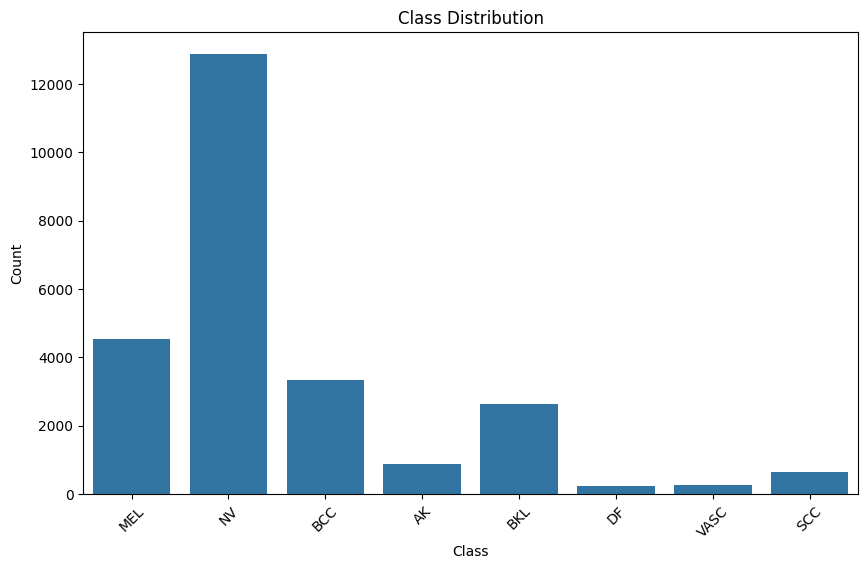

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=classes, y=[class_counts[i] for i in range(len(classes))])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Split data in PySpark
train_data_rdd, test_data_rdd = rdd.randomSplit([0.8, 0.2], seed=42)

# Convert back to separate RDDs if needed
train_images = train_data_rdd.map(lambda x: x[0]).repartition(100).collect()
train_labels = train_data_rdd.map(lambda x: x[1]).repartition(100).collect()
test_images = test_data_rdd.map(lambda x: x[0]).repartition(100).collect()
test_labels = test_data_rdd.map(lambda x: x[1]).repartition(100).collect()

In [25]:
# Preprocessing functions
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [260, 260])  # Resize without 'nearest' mode
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image

def data_augment(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label

def load_and_preprocess_from_path_labels(path, label):
    return load_and_preprocess_image(path), label

In [26]:
import tensorflow as tf

In [27]:
# Create TensorFlow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.map(load_and_preprocess_from_path_labels, num_parallel_calls=tf.data.AUTOTUNE)\
                   .map(data_augment, num_parallel_calls=tf.data.AUTOTUNE)\
                   .shuffle(2048).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_ds = test_ds.map(load_and_preprocess_from_path_labels, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [28]:
# Define learning rate schedule
LR_START = 0.00001
LR_MAX = 0.00005
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 4
LR_SUSTAIN_EPOCHS = 0
LR_EXP_DECAY = 0.8
EPOCHS = 15

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

In [29]:
# Load EfficientNetB2 model and add custom classification layer
base_model = tf.keras.applications.EfficientNetB2(include_top=False, input_shape=(260, 260, 3), pooling='avg')
base_output = base_model.output
classifier = tf.keras.layers.Dense(len(classes), activation='softmax')(base_output)
model = tf.keras.Model(inputs=base_model.input, outputs=classifier)

31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [30]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy'],
)

In [31]:
import time
start_time = time.time()
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    verbose=1,
    callbacks=[lr_callback],
)
end_time = time.time()
print(f"Time taken: {end_time - start_time:2f} seconds")


Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/15
634/634 ━━━━━━━━━━━━━━━━━━━━ 300s 292ms/step - accuracy: 0.4188 - loss: 1.6735 - val_accuracy: 0.4403 - val_loss: 3.2820 - learning_rate: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2e-05.
Epoch 2/15
634/634 ━━━━━━━━━━━━━━━━━━━━ 108s 167ms/step - accuracy: 0.6632 - loss: 0.9806 - val_accuracy: 0.7154 - val_loss: 0.8143 - learning_rate: 2.0000e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.0000000000000004e-05.
Epoch 3/15
634/634 ━━━━━━━━━━━━━━━━━━━━ 108s 167ms/step - accuracy: 0.7151 - loss: 0.7984 - val_accuracy: 0.7500 - val_loss: 0.7013 - learning_rate: 3.0000e-05

Epoch 4: LearningRateScheduler setting learning rate to 4e-05.
Epoch 4/15
634/634 ━━━━━━━━━━━━━━━━━━━━ 108s 167ms/step - accuracy: 0.7658 - loss: 0.6631 - val_accuracy: 0.7776 - val_loss: 0.6208 - learning_rate: 4.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 5e-05.
Epoch 5/15
634/634 ━━━━

In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 260, 260, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 260, 260, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 260, 260, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 260, 260, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 261, 261, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 130, 130, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 130, 130, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 130, 130, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 130, 130, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 130, 130, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 130, 130, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 23,204,375 (88.52 MB)

 Trainable params: 7,712,266 (29.42 MB)

 Non-trainable params: 67,575 (263.97 KB)

 Optimizer params: 15,424,534 (58.84 MB)

In [33]:
# Evaluate model performance
y_true = np.argmax(test_labels, axis=1)
y_pred = np.argmax(model.predict(test_ds), axis=1)

159/159 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step


In [34]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.828560142208177
Precision: 0.747726160572989
Recall: 0.7174105624591954
Confusion Matrix:
 [[ 668  175   23   10   40    4    0    3]
 [ 114 2349   33    5   37    6    1    1]
 [  27   25  582   19    4    3    1   14]
 [   8    6   17   95   19    1    0   15]
 [  49   83   23   13  366    2    0   10]
 [   4    8    3    2    0   25    1    5]
 [   1    2    4    0    0    0   38    0]
 [   4    3   24   12    3    1    0   72]]
